In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import numpy as np

In [3]:
#Read csv and create a dataframe
df = pd.read_csv('stencil_2.csv')

# Calculate slowdown, and tool slowdown
#df["slowdown"] = [row["avg_t(s)"]/df.loc[(df['compile'] == "base") & (df['measurement'] == "base") & (df['tasks'] == df['tasks'].min())]["avg_t(s)"].iloc[0] for index, row in df.iterrows()]
df["tool slowdown"] = [row["avg_t(s)"]/df.loc[(df['compile'] == "base") & (df['measurement'] == "base") & (df['tasks'] == row['tasks'])]["avg_t(s)"].iloc[0] for index, row in df.iterrows()]

# Create the new feature "compile:measurement" that is the combination of the "compile" and "measurement" features.
# We use this later for the "hue" arguement in the seaborn plotting functions, which creates a color encoding based 
#on the values of the "compile:measurement" feature. e.g. the data points for "base:base" and "tsan:must" will have different colors
df["compile:measurement"] = df["compile"] + ":" + df["measurement"]
display(df)

# Drop "base:must" because it is not of interest
df = df.drop(df[df["compile:measurement"] == "base:must"].index)

bench_id compile measurement  tasks  num_iters  grid_size  avg_t(s)  \
0         41    base        base     24        400      20000  0.093211   
1         41    base        must     24        400      20000  0.101288   
2         41    tsan        base     24        400      20000  0.876520   
3         41    tsan        must     24        400      20000  1.474257   
4         41    base        base     48        400      20000  0.045422   
5         41    base        must     48        400      20000  0.053436   
6         41    tsan        base     48        400      20000  0.626195   
7         41    tsan        must     48        400      20000  0.770547   
8         41    base        base     96        400      20000  0.022924   
9         41    base        must     96        400      20000  0.033269   
10        41    tsan        base     96        400      20000  0.287862   
11        41    tsan        must     96        400      20000  0.409369   
12        41    base        base    192        400      20000  0.011040   
13        41    base        must    192        400      20000  0.029213   
14        41    tsan        base    192        400      20000  0.155908   
15        41    tsan        must    192        400      20000  0.209394   
16        41    base        base    384        400      20000  0.005288   
17        41    base        must    384        400      20000  0.035963   
18        41    tsan        base    384        400      20000  0.079069   
19        41    tsan        must    384        400      20000  0.121535   

    rate (MFlops/s)  tool slowdown compile:measurement  
0      47195.414773       1.000000           base:base  
1      43431.658425       1.086653           base:must  
2       5018.848593       9.403611           tsan:base  
3       2983.956428      15.816341           tsan:must  
4      96850.042577       1.000000           base:base  
5      82324.290675       1.176434           base:must  
6       7025.158598      13.786161           tsan:base  
7       5709.090651      16.964180           tsan:must  
8     191899.157068       1.000000           base:base  
9     132227.502774       1.451274           base:must  
10     15282.055308      12.557233           tsan:base  
11     10746.112400      17.857660           tsan:must  
12    398474.354788       1.000000           base:base  
13    150587.148007       2.646105           base:must  
14     28216.100553      14.122101           tsan:base  
15     21008.772344      18.966848           tsan:must  
16    831945.953164       1.000000           base:base  
17    122325.029349       6.800870           base:must  
18     55636.650885      14.952534           tsan:base  
19     36196.216854      22.983169           tsan:must

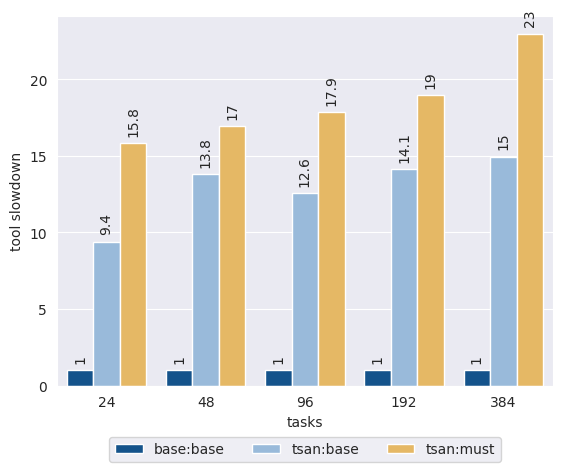

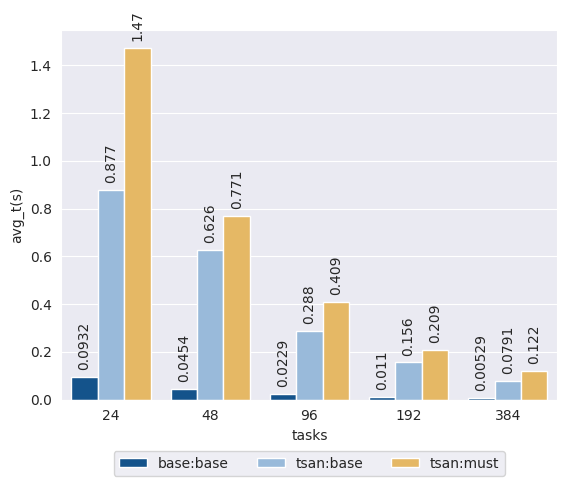

In [37]:
custom = {"grid.linestyle": "solid", "grid.color": "white"}
sns.set_style("darkgrid", rc = custom)

#Slowdown
plt.clf()
ax = sns.barplot(x="tasks", y="tool slowdown", data=df, hue="compile:measurement", palette=["#00549f", "#8ebae5", "#fabe50"]) 
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), fancybox=True, ncol=3)

#Show values
for i in ax.containers:
    texts = ax.bar_label(i, fmt='%.3g', rotation=90)
    for text in texts:
        text.set(y=5, zorder=2000)
plt.show()      


#Runtime
plt.clf()
ax = sns.barplot(x="tasks", y="avg_t(s)", data=df, hue="compile:measurement", palette=["#00549f", "#8ebae5", "#fabe50"]) 
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), fancybox=True, ncol=3)
#Show values
for i in ax.containers:
    texts = ax.bar_label(i, fmt='%.3g', rotation=90)
    for text in texts:
        text.set(y=5, zorder=2000)
plt.show()      
        